# 10. Hafta Lab-6: Android Zararlı Yazılım Sınıflandırma
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
### İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
#### Dr. Ferhat Özgür Çatak
Bu lab çalışması kapsamında android zararlı yazılımlarının (andorid malware)  sınıflandırma modeli oluşturulacaktır. *Mobile Malware Classification*

In [1]:
from arff2pandas import a2p
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

np.set_printoptions(linewidth=260)

Using TensorFlow backend.


### Android malware verikümesi
Veri kümesi arff formatındadır. Bunu pandas dataframe formatına çevirlmesi gerekmektedir.

In [2]:
f = "drebin_reduced.arff"
df = a2p.load(open(f,'r'))
print(df.shape)

(1919, 1122)


In [3]:
df.head(10)

,@NUMERIC,APP_NAME@STRING,SMS_MMS__SMS_MMS@NUMERIC,SMS_MMS__FILE_INFORMATION@NUMERIC,SMS_MMS__UNIQUE_IDENTIFIER@NUMERIC,SMS_MMS__FILE@NUMERIC,SMS_MMS__BLUETOOTH@NUMERIC,SMS_MMS__BLUETOOTH_INFORMATION@NUMERIC,SMS_MMS__EMAIL@NUMERIC,SMS_MMS__VOIP@NUMERIC,...,ACTION_REBOOT@NUMERIC,ACTION_DOCK_EVENT@NUMERIC,ACTION_GET_RESTRICTION_ENTRIES@NUMERIC,ACTION_USER_INITIALIZE@NUMERIC,ACTION_USER_FOREGROUND@NUMERIC,ACTION_USER_BACKGROUND@NUMERIC,ACTION_QUICK_CLOCK@NUMERIC,ACTION_OPEN_DOCUMENT@NUMERIC,ACTION_CREATE_DOCUMENT@NUMERIC,"class@{Plankton,GinMaster,Kmin,Glodream,BaseBridge,Nyleaker,Gappusin,Geinimi,Imlog,DroidKungFu,Iconosys,Adrd,DroidDream,Dougalek,MobileTx,FakeInstaller,ExploitLinuxLotoor,Steek,Opfake,Nandrobox,Xsider,Yzhc,Fatakr,FakeRun,Mobilespy,Hamob,Jifake,Fakengry,SMSreg}"
0,1.0,a8621506344640b8cc0d40d9bc3a124ddfeae48eeac5a8...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plankton
1,2.0,00002d74a9faa53f5199c910b652ef09d3a7f6bd42b693...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GinMaster
2,3.0,54b826480d096543873e31cbcf42f78706b48d5034b105...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kmin
3,4.0,10c5916590dac85bb7e14691a0b77114b7de9c33fa5878...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Glodream
4,6.0,13cbfc8772cfd18eebf87bba0e1f5280f220c5daa4d6ab...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BaseBridge
5,7.0,6f1af02b1836ac348e90b0ac69cd57f1f396b9b1d886be...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nyleaker
6,8.0,b387fee6de2400fb045b100437f82bcaf10dfa605eedeb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gappusin
7,9.0,6337b2ed626ae2ff6f9bd7e09a90abf78cc61c301d5dd1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Geinimi
8,11.0,b439f642007bd707ac806ba3f71e7b2a022e261fbd9b5d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Imlog
9,12.0,f4ccbe2c567e1f7fd9eaca2a92d5230956aa8b5a2d9b79...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DroidKungFu


### Zararlı yazılım ailesi

In [4]:
df['app_label'] = df.iloc[:,1121]
df['app_label'].head(30)

0        Plankton
1       GinMaster
2            Kmin
3        Glodream
4      BaseBridge
5        Nyleaker
6        Gappusin
7         Geinimi
8           Imlog
9     DroidKungFu
10       Plankton
11       Glodream
12       Iconosys
13           Adrd
14    DroidKungFu
15           Adrd
16       Glodream
17       Plankton
18     BaseBridge
19     DroidDream
20     DroidDream
21       Plankton
22     DroidDream
23      GinMaster
24       Plankton
25           Adrd
26           Adrd
27       Plankton
28       Plankton
29       Dougalek
Name: app_label, dtype: object

### Veri hazırlama
Son kolon (etiket kolonu) ve ilk iki kolon *@NUMERIC*, *APP_NAME@STRING* silinecek.

In [5]:
df.drop(df.columns[[1121]], axis=1, inplace=True)
df.drop(['@NUMERIC', 'APP_NAME@STRING'], axis=1, inplace=True)

**X** ve **y** değişkenlerini tanımla.

In [6]:
y = df['app_label'].as_matrix()
df.drop(['app_label'], axis=1, inplace=True)
X = df.as_matrix()

c:\users\ozgur\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\ozgur\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Modeli oluştur

In [7]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_Y = np_utils.to_categorical(encoded_Y)
print(encoded_Y.shape)

model = Sequential()
model.add(Dense(500, input_dim=X.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dropout(0.1))
model.add(Dense(1000, activation='tanh', kernel_initializer='uniform'))
model.add(Dropout(0.1))
model.add(Dense(1500, activation='tanh', kernel_initializer='uniform'))
model.add(Dropout(0.1))
model.add(Dense(1000, activation='tanh', kernel_initializer='uniform'))
model.add(Dropout(0.1))
model.add(Dense(500, activation='tanh', kernel_initializer='uniform' ))
model.add(Dropout(0.1))
model.add(Dense(dummy_Y.shape[1], activation='softmax', kernel_initializer='uniform'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

(1919,)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               560000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1500)              1501500   
_________________________________________________________________
dropout_3 (Dr

### Modeli eğit

In [8]:
history = model.fit(X, dummy_Y, validation_split=0.3, epochs=15, batch_size=50, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 1343 samples, validate on 576 samples
Epoch 1/15
1343/1343 [==============================] - 2s 2ms/step - loss: 2.9969 - acc: 0.1713 - val_loss: 2.6440 - val_acc: 0.2552
Epoch 2/15
1343/1343 [==============================] - 2s 1ms/step - loss: 2.5585 - acc: 0.3068 - val_loss: 2.0787 - val_acc: 0.4740
Epoch 3/15
1343/1343 [==============================] - 2s 1ms/step - loss: 2.2148 - acc: 0.4252 - val_loss: 1.7890 - val_acc: 0.5486
Epoch 4/15
1343/1343 [==============================] - 1s 1ms/step - loss: 1.9827 - acc: 0.4646 - val_loss: 1.7312 - val_acc: 0.5590
Epoch 5/15
1343/1343 [==============================] - 1s 1ms/step - loss: 1.8746 - acc: 0.4974 - val_loss: 1.5600 - val_acc: 0.5729
Epoch 6/15
1343/1343 [==============================] - 1s 1ms/step - loss: 1.7243 - acc: 0.5450 - val_loss: 1.5363 - val_acc: 0.5868
Epoch 7/15
1343/1343 [==============================] - 2s 1ms/step - loss: 1.6308 - acc: 0.5666 - va

### Model performansı

In [9]:
y_hat = model.predict_classes(X)
cm = confusion_matrix(encoded_Y, y_hat)
print(cm)

[[  0   7   0   0  16   0   1   0   0   0   0   0   2   0   0   0   1   0   0   0   0   0   0   1  25   0   0   0   0]
 [  0 220   0   0  17   0   2   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0   1  21   0   0   0   0]
 [  0   0  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   8   0   1   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2  35   0   0   0   0]
 [  0   8   0   0 142   0   3   0   0   0   2   3   2   0   1   0   1   0  14   0   0   0   1   0  43   0   0   0   0]
 [  0  10   0   0   6   0   1   0   0   0   0   1   3   0   1   0   0   0   3   0   0   0   0   0   7   0   0   0   0]
 [  0   5   0   0   2   0  52   0   0   0   0   2   0   0   0   0   1   0   1   0   0   0   0   3   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  50   0   0   0   0]
 [  0   4   0   0   2   0   0   0   1   0   0   

### Tarihçe

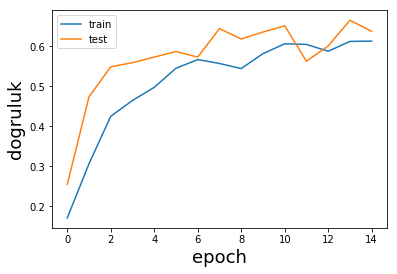

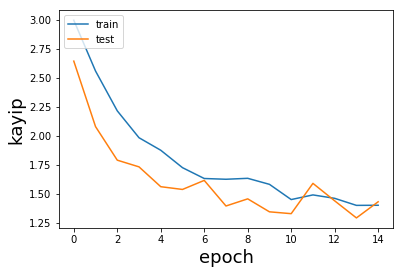

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()